In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
start=datetime.now()
data=pd.read_csv("/Volumes/Macintosh HD/Users/huangqichao/Desktop/学术/NYU /Big Data/SPY_May_2012.csv")

In [21]:
data.shape

(9153148, 15)

In [3]:
data=data[data['Type']=='Trade']

In [4]:
data.reset_index(inplace=True)
data.head()

,index,#RIC,Date[G],Time[G],GMT Offset,Type,Price,Volume,Market VWAP,Bid Price,Bid Size,Ask Price,Ask Size,Qualifiers
0,296,SPY,01-MAY-2012,08:26:21.766,-4,Trade,140.00,200.0,NaN,NaN,NaN,NaN,NaN,T [GV4_TEXT];131[IRGCOND];NBL[PRC_QL2]
1,362,SPY,01-MAY-2012,08:28:58.362,-4,Trade,139.96,100.0,NaN,NaN,NaN,NaN,NaN,T [GV4_TEXT];131[IRGCOND];NBL[PRC_QL2]
2,363,SPY,01-MAY-2012,08:28:58.362,-4,Trade,139.96,200.0,NaN,NaN,NaN,NaN,NaN,T [GV4_TEXT];131[IRGCOND];NBL[PRC_QL2]
3,384,SPY,01-MAY-2012,08:30:40.861,-4,Trade,139.95,100.0,NaN,NaN,NaN,NaN,NaN,T [GV4_TEXT];131[IRGCOND];NBL[PRC_QL2]
4,885,SPY,01-MAY-2012,08:59:13.410,-4,Trade,139.93,200.0,NaN,NaN,NaN,NaN,NaN,T [GV4_TEXT];131[IRGCOND];NBL[PRC_QL2]


In [5]:
"""
13:30-20:00
every 15 min as an interval
"""
#data['Label']=np.nan
# df=data['Time[G]']
# int(df[0].split(':')[0])
def set_label(row):
    res=0
    try:
        tmp_list=map(int,row['Time[G]'].split(':')[:-1])
    except:
        return np.nan
    if tmp_list[0]<13 or tmp_list[0]>20:
        return np.nan
    else:
        res+=(tmp_list[0]-13)*4+int(tmp_list[1]/15)
    return res
        
data['Label']=data.apply(set_label,axis=1)


In [6]:
grouped=data.groupby(['Label','Date[G]'])['Volume']
vol_interval_day=grouped.sum()

In [7]:
def label_totime(label):
    hour=str(int(label/4)+13-4)
    minute=str((label-label/4*4)*15)
    if minute=='0':
        minute='00'
    return hour+":"+minute
trade_time=map(label_totime,range(32))

In [19]:
trade_day=list(vol_interval_day[1].index)[:14]
print trade_day
volume=[(i,vol_interval_day[i][trade_day].mean()) for i in range(32)]
dict_volume=dict(volume)
#dict_volume

['01-MAY-2012', '02-MAY-2012', '03-MAY-2012', '04-MAY-2012', '07-MAY-2012', '08-MAY-2012', '09-MAY-2012', '10-MAY-2012', '11-MAY-2012', '14-MAY-2012', '15-MAY-2012', '16-MAY-2012', '17-MAY-2012', '18-MAY-2012']


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/qichaohuang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


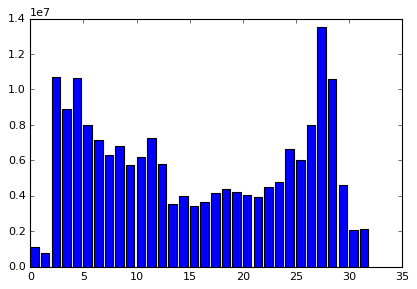

In [10]:
plt.bar(zip(*volume)[0],zip(*volume)[1]);

In [11]:
def get_price(label):
    return float(data[(data['Date[G]']=='21-MAY-2012') & (data['Label']==label)].head(1)['Price'])
    
price=[(i,get_price(i)) for i in range(32)]


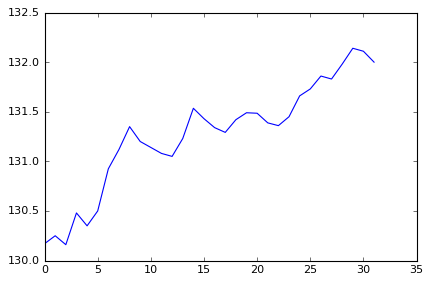

In [12]:
plt.plot(zip(*price)[1]);

In [24]:
data[data['Time[G]']=="10:34:56.366"]

,index,#RIC,Date[G],Time[G],GMT Offset,Type,Price,Volume,Market VWAP,Bid Price,Bid Size,Ask Price,Ask Size,Qualifiers,Label
26,1881,SPY,01-MAY-2012,10:34:56.366,-4,Trade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBL[PRC_QL2],NaN


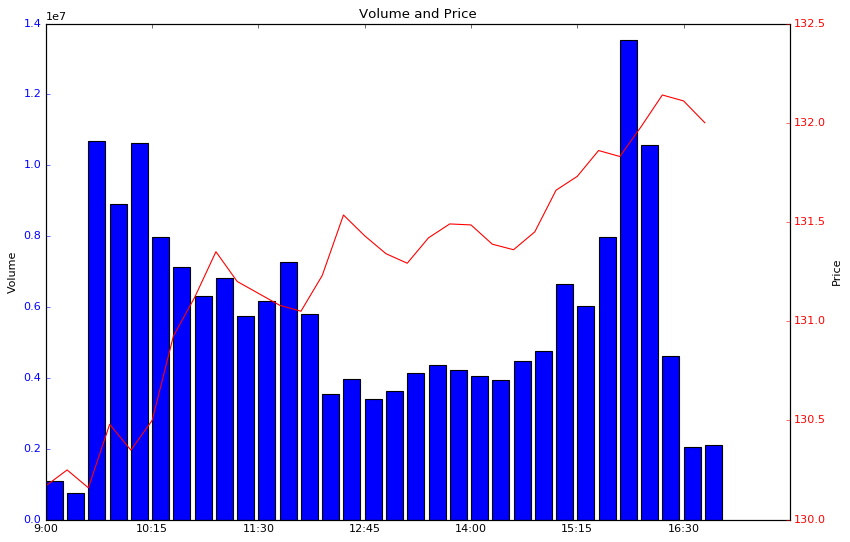

In [13]:
fig, ax1 = plt.subplots(figsize=(12,8))
plt.title('Volume and Price')
ax1.bar(zip(*volume)[0],zip(*volume)[1])
ax1.set_ylabel("Volume")
ax1.set_xlim([0,31])
ax1.tick_params('y', colors='b')
ax1.set_xticklabels([trade_time[i] for i in range(0,35,5)])
ax2=ax1.twinx()
ax2.plot(zip(*price)[1],color='r')
ax2.set_ylabel('Price')
ax2.tick_params('y', colors='r')

In [14]:

import csv

with open('test.csv', 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(trade_time)
    wr.writerow(list(zip(*volume)[1]))
    wr.writerow(list(zip(*price)[1]))


In [15]:
print 'time used is:',datetime.now()-start

time used is: 0:07:37.818962
